In [12]:
import numpy as np
import pandas as pd
from sklearn import tree
import sklearn.metrics as metrics # accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt

import import_ipynb
from plot_confusion_matrix import plot_my_conf_matrix as conf_x
%matplotlib inline

In [13]:
# loading train and test data and cleaning missing values
raw_df_train = pd.read_csv('../pendigits_data/pendigits.tra', delimiter=',', header=None)
raw_df_test = pd.read_csv('../pendigits_data/pendigits.tes', delimiter=',', header=None)
# print(raw_df_train.head()) # prints sample of the dataset
train_df_clean = raw_df_train.dropna() # drop any rows with missing values
print("Dropped rows in train set: %d" %(raw_df_train.shape[0] - train_df_clean.shape[0])) # number of rows dropped for some missing values
# print(train_df_clean.describe()) # prints statistics column wise for train data

test_df_clean = raw_df_test.dropna()
print("Dropped rows in train set: %d" %(raw_df_test.shape[0] - test_df_clean.shape[0])) # number of rows dropped for some missing values
# print(test_df_clean.describe()) # prints statistics column wise for test data

Dropped rows in train set: 0
Dropped rows in train set: 0


In [14]:
# seperating the label column for train and test set
x_train = train_df_clean.drop(axis=1, columns=[16])
y_train = train_df_clean.iloc[:, 16]

x_test = test_df_clean.drop(axis=1, columns=[16])
y_test = test_df_clean.iloc[:, 16]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(7494, 16) (7494,) (3498, 16) (3498,)


In [15]:
def print_accuray_precision_recall(y_true, y_predict):
    """Prints accuray, presion for each classes and recall for each classes."""
    print("Accuracy: ", metrics.accuracy_score(y_true, y_predict)) # accuracy score
    print("Precition per class: ", metrics.precision_score(y_true, y_predict, average=None)) # precision scores for each class
    print("Precision: ", metrics.precision_score(y_true, y_predict, average='macro')) # Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account,
    print("Recall per class: ", metrics.recall_score(y_true, y_predict, average=None)) # recall score for each class
    print("Recall: ", metrics.recall_score(y_true, y_predict, average='macro'))

Accuracy:  1.0
Precition per class:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Precision:  1.0
Recall per class:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Recall:  1.0


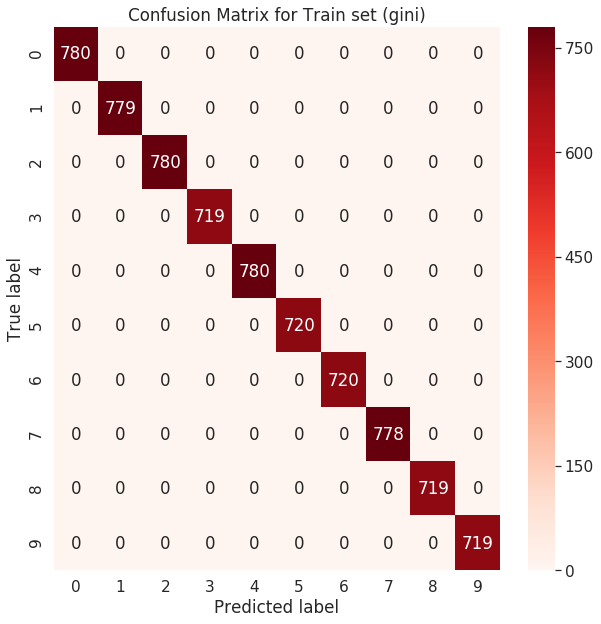

In [16]:
# gini decision tree model. accracy, precision and recall for training instances. And confusion matrix.
gini_model = tree.DecisionTreeClassifier(criterion='gini')
gini_model.fit(x_train, y_train)
y_predict = gini_model.predict(x_train)
print_accuray_precision_recall(y_train, y_predict)
conf_x(y_train, y_predict, classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], title="Confusion Matrix for Train set (gini)", save_path="saved_images/conf_matrix_gini_train_set.png")

Accuracy:  0.9128073184676958
Precition per class:  [0.94459834 0.84266667 0.8675     0.86629526 0.91884817 0.95238095
 0.96923077 0.94461538 0.91304348 0.93373494]
Precision:  0.9152913961027039
Recall per class:  [0.93939394 0.86813187 0.9532967  0.92559524 0.96428571 0.8358209
 0.9375     0.84340659 0.9375     0.92261905]
Recall:  0.9127549999751492


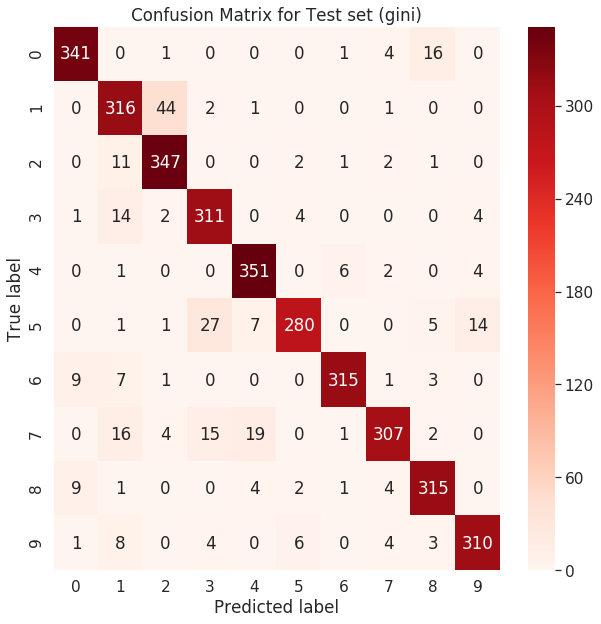

In [17]:
# gini decision tree model. accracy, precision and recall for test instances. And confusion matrix.
gini_model = tree.DecisionTreeClassifier(criterion='gini')
gini_model.fit(x_train, y_train)
y_predict = gini_model.predict(x_test)
print_accuray_precision_recall(y_test, y_predict)
conf_x(y_test, y_predict, classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], title="Confusion Matrix for Test set (gini)", save_path="saved_images/conf_matrix_gini_test_set.png")

In [7]:
# gini decision tree model, with 5-fold cross validation
gini_model = tree.DecisionTreeClassifier(criterion='gini')
cross_val_score(gini_model, x_train, y_train, cv=5)

array([0.95933333, 0.966     , 0.95666667, 0.9533022 , 0.96454849])

Accuracy:  1.0
Precition per class:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Precision:  1.0
Recall per class:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Recall:  1.0


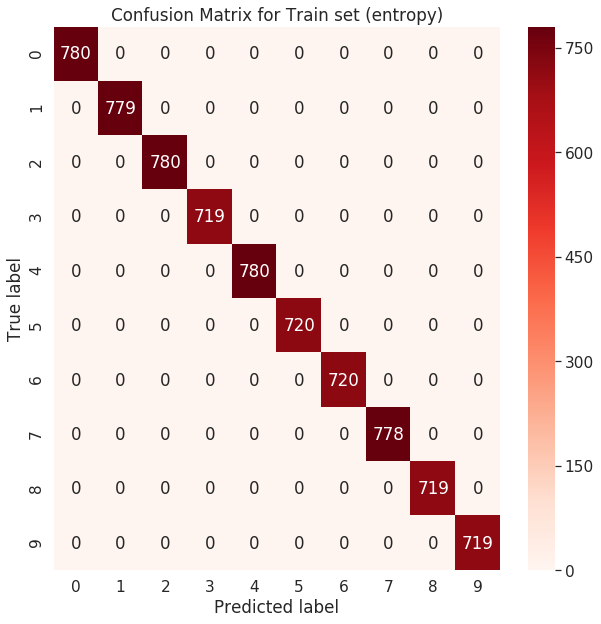

In [18]:
# entropy decision tree model. accracy, precision and recall for train instances. And confusion matrix.
entropy_model = tree.DecisionTreeClassifier(criterion='entropy')
entropy_model.fit(x_train, y_train)
y_predict = entropy_model.predict(x_train)
print_accuray_precision_recall(y_train, y_predict)
conf_x(y_train, y_predict, classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], title="Confusion Matrix for Train set (entropy)", save_path="saved_images/conf_matrix_entropy_train_set.png")

Accuracy:  0.9190966266437964
Precition per class:  [0.96195652 0.87267905 0.89090909 0.91304348 0.92479109 0.89655172
 0.99022801 0.96706587 0.88203753 0.90634441]
Precision:  0.9205606772171823
Recall per class:  [0.97520661 0.90384615 0.94230769 0.9375     0.91208791 0.85373134
 0.9047619  0.88736264 0.97916667 0.89285714]
Recall:  0.9188828064743939


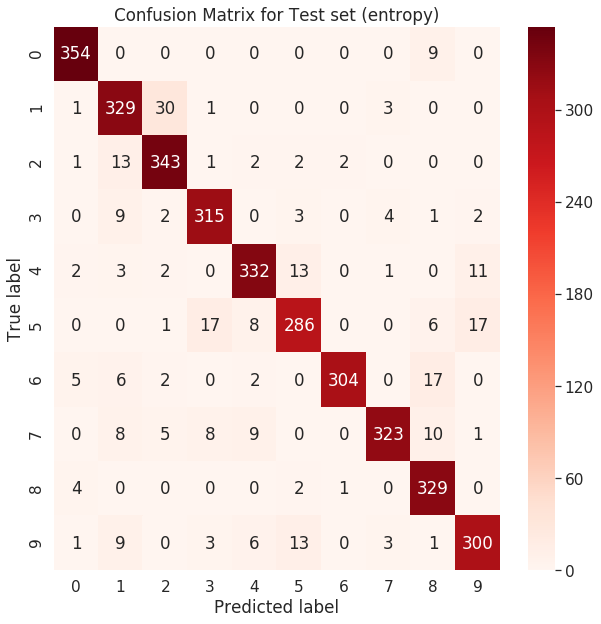

In [19]:
# entropy decision tree model. accracy, precision and recall for test instances. And confusion matrix.
entropy_model = tree.DecisionTreeClassifier(criterion='entropy')
entropy_model.fit(x_train, y_train)
y_predict = entropy_model.predict(x_test)
print_accuray_precision_recall(y_test, y_predict)
conf_x(y_test, y_predict, classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], title="Confusion Matrix for Test set (entropy)", save_path="saved_images/conf_matrix_entropy_test_set.png")

In [20]:
# entropy decision tree model, with 5-fold cross validation
entropy_model = tree.DecisionTreeClassifier(criterion='entropy')
cross_val_score(entropy_model, x_train, y_train, cv=5)

array([0.95466667, 0.96266667, 0.96533333, 0.9593062 , 0.96120401])